In [16]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import scipy.odr as odr

In [31]:
data = np.loadtxt("2017-02-14-VovsWavelength.csv",dtype=float,comments="#",delimiter=",")
l = data[:,0]*1e-9
v = data[:,1]
print l
print v
c=3e8
f=c/l
print f

[  4.05000000e-07   4.30000000e-07   4.70000000e-07   5.05000000e-07
   5.35000000e-07   5.70000000e-07   6.01000000e-07]
[ 1.2   1.    0.75  0.75  0.65  0.55  0.35]
[  7.40740741e+14   6.97674419e+14   6.38297872e+14   5.94059406e+14
   5.60747664e+14   5.26315789e+14   4.99168053e+14]


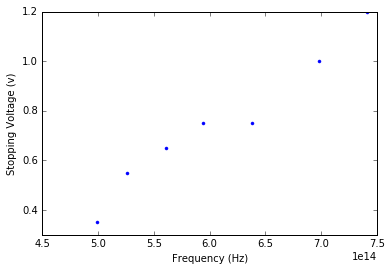

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(f, v, ".")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel ("Stopping Voltage (v)")

In [67]:
def line(params, f):
    (m, b) = params[:]
    iModel=m*f+b
    return iModel
print line((1.,2.),np.linspace(1.,2,10))

[ 3.          3.11111111  3.22222222  3.33333333  3.44444444  3.55555556
  3.66666667  3.77777778  3.88888889  4.        ]


In [68]:
myModel = odr.Model(line)
myData = odr.RealData(f, v, sx=.1, sy=0.1)

In [69]:
slope0=(v[-1]-v[0])/(f[-1]-f[0])
b0=v[0]-slope0*f[0]
print slope0
print b0
initParams = np.array([slope0, b0])
myOdr = odr.ODR(myData, myModel, beta0=initParams)

3.51860969388e-15
-1.40637755102


In [70]:
myOutput = myOdr.run()
print myOutput.pprint()
print myOutput.beta

Beta: [  3.08789475e-15  -1.12788287e+00]
Beta Std Error: [  3.03319512e-16   1.86147126e-01]
Beta Covariance: [[  2.10423286e-31  -1.27967537e-16]
 [ -1.27967537e-16   7.92511864e-02]]
Residual Variance: 0.437226924244
Inverse Condition #: 0.0558104999032
Reason(s) for Halting:
  Sum of squares convergence
None
[  3.08789475e-15  -1.12788287e+00]


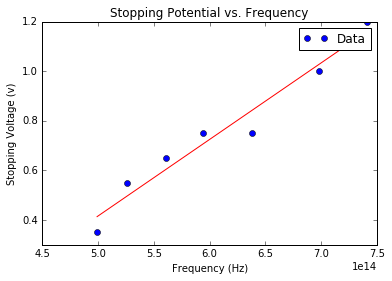

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(f, v, "o", label='Data')
fPlot = np.linspace(min(f),max(f))
vPlot = line(myOutput.beta, fPlot)
ax.plot(fPlot,vPlot, 'r-')
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel ("Stopping Voltage (v)")
plt.title("Stopping Potential vs. Frequency")
ax.legend()

In [74]:
fig.savefig("finalPlot.png", dpi=250)